# Infoli Task Inspector

In [1]:
import import_ipynb
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
try:
    from infoliLauncher import infoliTask, pklFile
except:
    from infoliLauncher import infoliTask, pklFile

importing Jupyter notebook from infoliLauncher.ipynb


This notebook gives the possibility to inspect the list of tasks saved in the file defined by `pklFile` while the `infoliLauncher` notebook is still running simulations.

In [2]:
with open("myTasklist_2.dat", "rb") as f:
    listOfTasks = pkl.load(f)

In [3]:
listOfTasks[4].getData()

{'parameters': {'simTime': 0.003,
  'connectivity': 0.7787355458738761,
  'neurons': 6877,
  'memory': 16384,
  'CPU': 16,
  'timeout': 14400},
 'results': {'hasExecuted': True,
  'setupTime': 0.31,
  'execTime': 150.49,
  'startTime': 1582732195.1106813,
  'endTime': 1582732346.876739,
  'measureTime': 151.76605772972107,
  'hasEndedInTimeout': False,
  'hasEndedInError': False}}

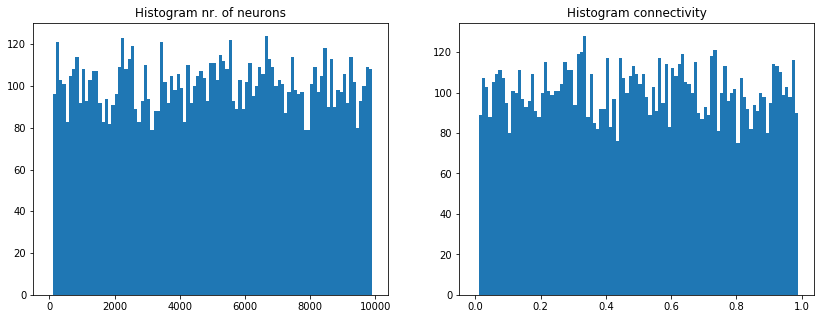

In [4]:
plt.rcParams['figure.figsize'] = [14, 5]
plt.subplot(121)
plt.title("Histogram nr. of neurons")
plt.hist([task.getData()['parameters']['neurons'] for task in listOfTasks],bins=np.arange(100)*100);
plt.subplot(122)
plt.title("Histogram connectivity")
plt.hist([task.getData()['parameters']['connectivity'] for task in listOfTasks],bins=np.arange(100)/100);

In [5]:
np.sum([task.hasFinished() == True for task in listOfTasks])

1117

In [6]:
myData = [task.getData() for task in listOfTasks if \
          task.getData()['results']['hasExecuted'] and \
          not task.getData()['results']['hasEndedInTimeout'] and \
          not task.getData()['results']['hasEndedInError']]
        #  task.getData()['parameters']['connectivity'] < 0.32 and \
        #  task.getData()['parameters']['connectivity'] > 0.28]

In [7]:
myData = [task.getData() for task in listOfTasks if \
          task.getData()['results']['hasExecuted'] and \
          not task.getData()['results']['hasEndedInTimeout'] and \
          not task.getData()['results']['hasEndedInError']]

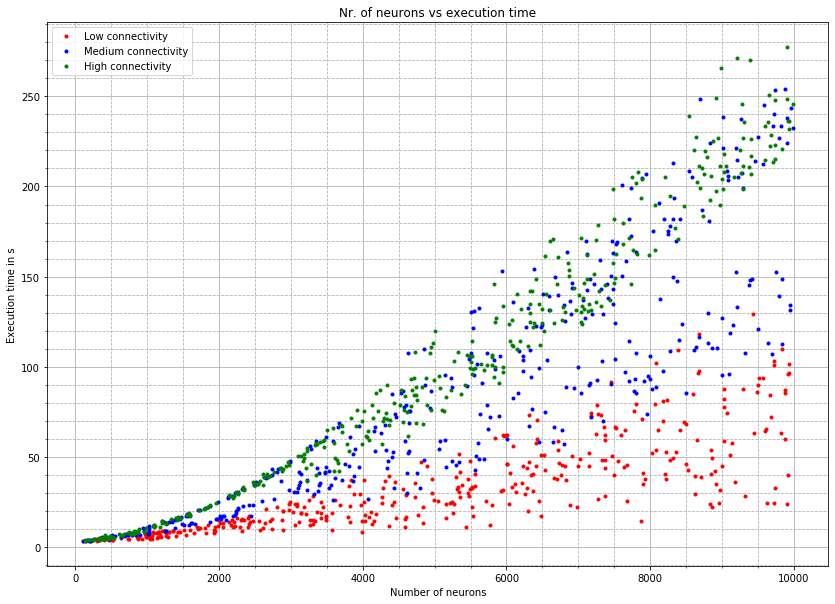

In [8]:
plt.rcParams['figure.figsize'] = [14, 10]
filteredData1 = [d for d in myData if \
                d['parameters']['connectivity'] <= 0.33 and \
                d['parameters']['connectivity'] >= 0]
filteredData2 = [d for d in myData if \
                d['parameters']['connectivity'] <= 0.67 and \
                d['parameters']['connectivity'] > 0.33]
filteredData3 = [d for d in myData if \
                d['parameters']['connectivity'] <= 1 and \
                d['parameters']['connectivity'] > 0.67]
plt.plot([d['parameters']['neurons'] for d in filteredData1],[d['results']['execTime'] for d in filteredData1],'r.', label="Low connectivity")
plt.plot([d['parameters']['neurons'] for d in filteredData2],[d['results']['execTime'] for d in filteredData2],'b.', label="Medium connectivity")
plt.plot([d['parameters']['neurons'] for d in filteredData3],[d['results']['execTime'] for d in filteredData3],'g.', label="High connectivity")
plt.xlabel("Number of neurons")
plt.ylabel("Execution time in s")
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')
plt.minorticks_on()
plt.title("Nr. of neurons vs execution time")
plt.legend()